## The objective of the project is to construct a model capable of forecasting car prices based on specific variables.

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection and preprocessing

In [2]:
# Loading the data
car_data = pd.read_csv("car data.csv")

In [3]:
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Checking number of rows and columns
car_data.shape

(301, 9)

In [5]:
# Getting info on dataframe
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# cheching the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


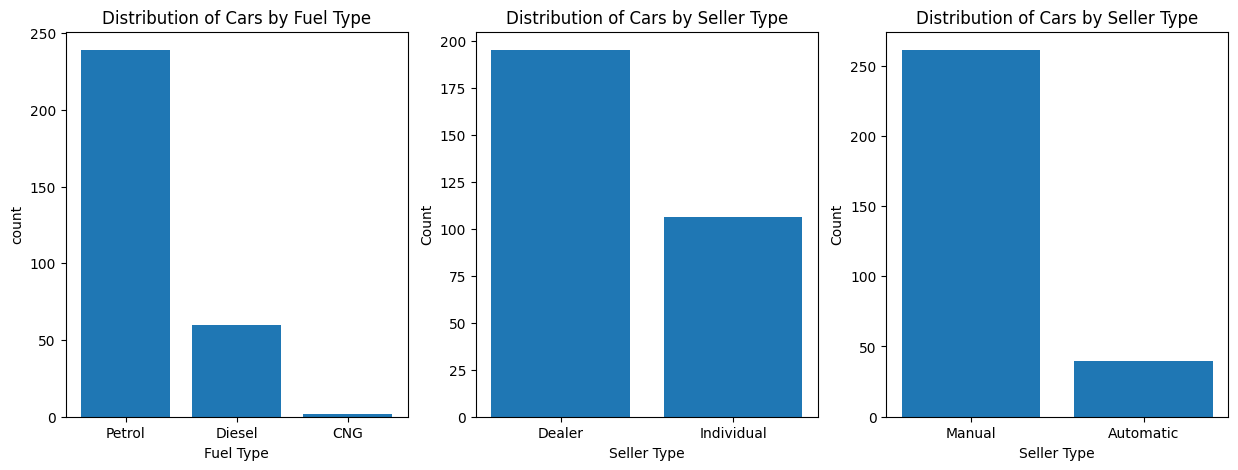

In [8]:
# visualize these distributions

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(car_data.Fuel_Type.value_counts().index, car_data.Fuel_Type.value_counts())
axes[0].set_title("Distribution of Cars by Fuel Type")
axes[0].set_xlabel("Fuel Type")
axes[0].set_ylabel("count")

axes[1].bar(car_data.Seller_Type.value_counts().index, car_data.Seller_Type.value_counts())
axes[1].set_title("Distribution of Cars by Seller Type")
axes[1].set_xlabel("Seller Type")
axes[1].set_ylabel("Count")

axes[2].bar(car_data.Transmission.value_counts().index, car_data.Transmission.value_counts())
axes[2].set_title("Distribution of Cars by Seller Type")
axes[2].set_xlabel("Seller Type")
axes[2].set_ylabel("Count")

plt.show()

In [9]:
# Encoding categorical data 

# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
# Splitting the data into independent and dependent variables

X = car_data.drop(['Car_Name','Selling_Price'], axis= 1)
Y = car_data['Selling_Price']


In [12]:
# Splitting the data into train andtest data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

## Linear Regression Model

In [13]:
# Loading the linear regression model
linear_reg_model = LinearRegression()

In [14]:
# fiting the data to the model
linear_reg_model.fit(X_train,Y_train)

LinearRegression()

In [15]:
# Predicting the data
training_data_pred = linear_reg_model.predict(X_train)

In [16]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493709


#### Actual VS Predicted

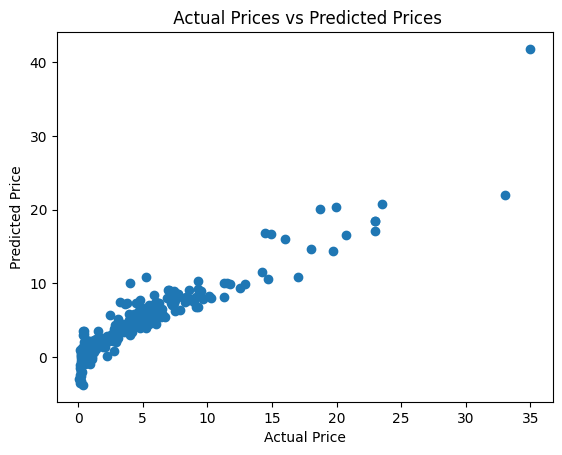

In [17]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [34]:
# prediction on Testing data
test_data_pred = linear_reg_model.predict(X_test)

In [35]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026535


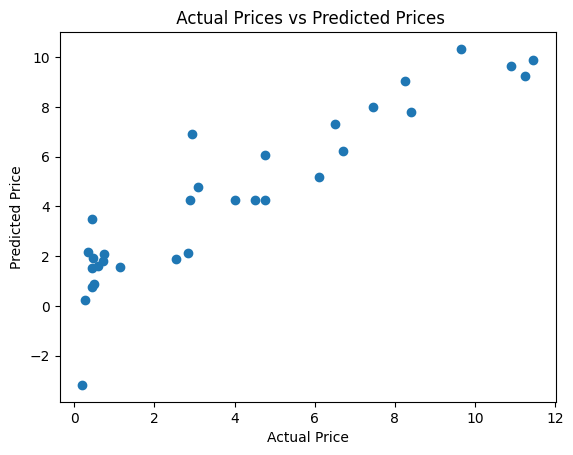

In [36]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Predicting the price of a new car based on our linear regression model

In [18]:
# Defining new parameters
new_data = {'Car_Name': ['Hyundai'], 
            'Year': [2022], 
            'Present_Price': [8.0], 
            'Kms_Driven': [15000], 
            'Fuel_Type': [0],  
            'Seller_Type': [1],  
            'Transmission': [1], 
            'Owner': [0]} 

# Creating a DataFrame with new parameters
new_data_df = pd.DataFrame(new_data)

# Dropping 'Car_Name' as it was dropped during training
X_new = new_data_df.drop(['Car_Name'], axis=1)

# Using the trained model to predict the selling price
predicted_price = linear_reg_model.predict(X_new)

# Printing the predicted price
print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 8.755717998887462


## Lasso Regression Model

In [19]:
# Loading the data
lasso_reg_model = Lasso()

In [20]:
# Fitting the data to the dataset
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [21]:
# Predicting the traning data 
lasso_train_pred = lasso_reg_model.predict(X_train) 

In [22]:
# Evaluating the training data
r_squarred = metrics.r2_score(Y_train,lasso_train_pred)
r_squarred 

0.8427856123435794

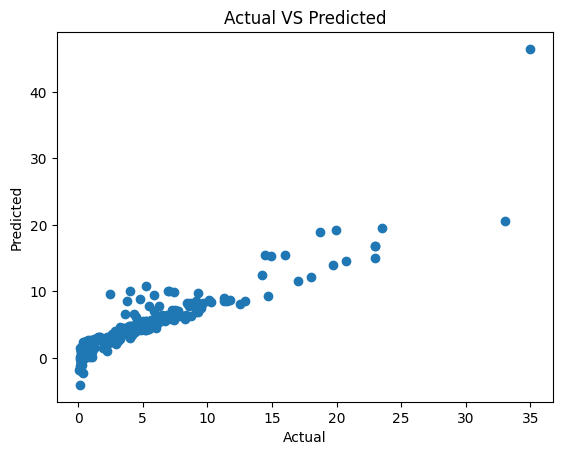

In [23]:
# Visualization 

plt.scatter(Y_train, lasso_train_pred)
plt.title("Actual VS Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [24]:
# Predicting the test car_data

lasso_test_pred = lasso_reg_model.predict(X_test)

In [25]:
# Evaluate the model

r_squarred1 = metrics.r2_score(Y_test, lasso_test_pred)
r_squarred1 

0.8709167941173195

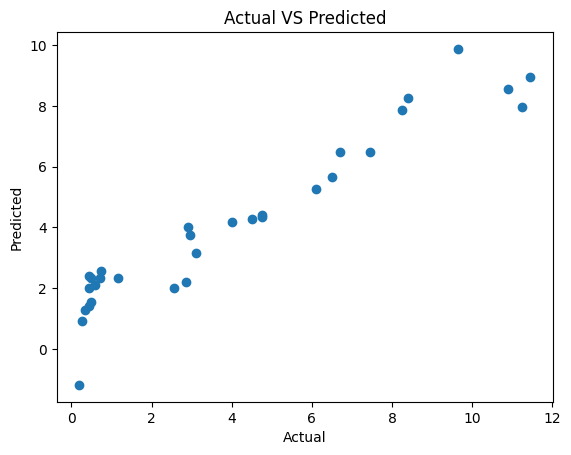

In [26]:
# Visualization 

plt.scatter(Y_test, lasso_test_pred)
plt.title("Actual VS Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Predicting the price of a new car based on our Lasso model

In [27]:
# Defining new parameters
new_data = {'Car_Name': ['Hyundai'], 
            'Year': [2022], 
            'Present_Price': [8.0], 
            'Kms_Driven': [15000], 
            'Fuel_Type': [0],  
            'Seller_Type': [1],  
            'Transmission': [1], 
            'Owner': [0]} 

# Creating a DataFrame with new parameters
new_data_df = pd.DataFrame(new_data)

# Dropping 'Car_Name' as it was dropped during training
X_new = new_data_df.drop(['Car_Name'], axis=1)

# Using the trained model to predict the selling price
predicted_price = lasso_reg_model.predict(X_new)

# Printing the predicted price
print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 7.868971896330891


### The Lasso model demonstrates a slightly superior R-squared score, suggesting its enhanced ability to predict car prices compared to Linear Regression model.